# Phylogenetics

- phylogenetics is the study of the evolutionary history and relationship among individuals or groups of organisms

In [2]:
import biotite.sequence.phylo as phylo

In [3]:
dir(phylo)

['Tree',
 'TreeError',
 'TreeNode',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'as_binary',
 'neighbor_joining',
 'nj',
 'tree',
 'upgma']

In [8]:
# The reference objects
fruits = ["Apple","Pear","Orange","Lemon","Banana"]

# Create nodes
apple  = phylo.TreeNode(index=fruits.index("Apple"))
pear   = phylo.TreeNode(index=fruits.index("Pear"))
orange = phylo.TreeNode(index=fruits.index("Orange"))
lemon  = phylo.TreeNode(index=fruits.index("Lemon"))
banana = phylo.TreeNode(index=fruits.index("Banana"))

# Tree structure
intermediate1 = phylo.TreeNode(children=(apple,pear), distances=(2.0, 2.0))
intermediate2 = phylo.TreeNode(children=(orange,lemon), distances=(1.0, 1.0))
intermediate3 = phylo.TreeNode(children=(intermediate2,banana), distances=(2.0, 3.0))

# Root of Tree
root = phylo.TreeNode(children=(intermediate1, intermediate3), distances=(2.0, 1.0))

In [10]:
# Create tree from root tree
tree = phylo.Tree(root=root)
# Trees can be converted into Newick notation
print("Tree:", tree.to_newick(labels=fruits))

# Distances can be omitted
print("Tree w/o distances:", tree.to_newick(labels=fruits, include_distance=False))

# Distances can be measured
distance = tree.get_distance(fruits.index("Apple"), fruits.index("Banana"))
print("Distances Apple-Banana: ", distance)

Tree: ((Apple:2.0,Pear:2.0):2.0,((Orange:1.0,Lemon:1.0):2.0,Banana:3.0):1.0):0.0;
Tree w/o distances: ((Apple,Pear),((Orange,Lemon),Banana));
Distances Apple-Banana:  8.0


#### Plot a Phylo Tree

In [11]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

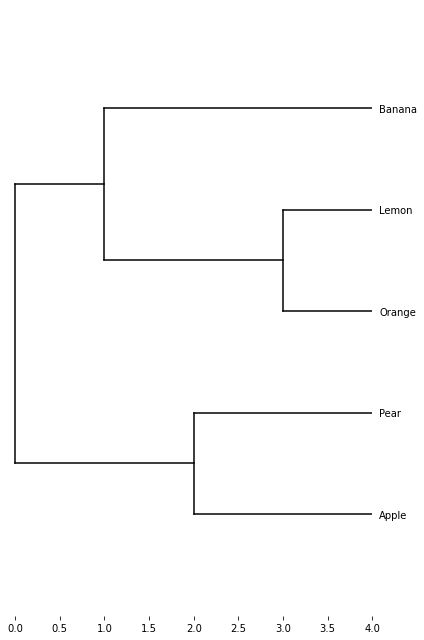

In [13]:
# Plot a phylo tree
fig, ax = plt.subplots(figsize=(6.0, 9.0))
graphics.plot_dendrogram(ax, tree, labels=fruits)
fig.tight_layout()

# Cool!